# Data Processing 
# Mini Project
### -Submission by Sai Manasa Ivaturi(sivatur)

### Importing Libraries

In [1]:
import math
import random
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import mean, std

from sklearn import preprocessing
from sklearn import linear_model
from sklearn import svm
from sklearn import tree

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold



from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc
from sklearn.metrics import mutual_info_score,mean_squared_error,r2_score

from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Setting Path

In [2]:
path = '/Users/manasaivaturi/Desktop/Data Processing/'

## Task 1

Pick One data set From Kaggle that you will be most confident to work and Follow the data preprocessing Steps on it. You need to complete  Below mentioned tasks on the data set.

    Handling Null Values
    Standardization
    Handling Categorical Variables
    One-Hot Encoding
    Multicollinearity

#### About Data Set

The Dataset is available on Kaggle. The Dataset contains 21 columns, 19 independent variables that indicate the characteristics of clients of a fictional telecommunications corporation.

The columns can be divided into 3 types as follows:

    (1) Demographic Information

    | Attribute     | Description                                             |
    |---------------|---------------------------------------------------------|
    | gender        | Whether the client is a female or a male (Female, Male) |
    | SeniorCitizen | Whether the client is a senior citizen or not ( 0, 1).  |
    | Partner       | Whether the client has a partner or not (Yes, No).      |
    | Dependents    | Whether the client has dependents or not (Yes, No).     |

    
    (2) Customer Account Information

    | Attribute        | Description                                                                                    |
    |------------------|------------------------------------------------------------------------------------------------|
    | tenure           | Number of months the customer has stayed with the company (Multiple different numeric values). |
    | Contract         | Indicates the customer’s current contract type (Month-to-Month, One year, Two year).           |
    | PaperlessBilling | Whether the client has paperless billing or not (Yes, No).                                     |
    | PaymentMethod    | The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit Card.     |
    | MontlyCharges    | The amount charged to the customer monthly (Multiple different numeric values).                |
    | TotalCharges     | The total amount charged to the customer (Multiple different numeric values).                  |

    (3) Services Information

    | Attribute        | Description                                                                                  |
    |------------------|----------------------------------------------------------------------------------------------|
    | PhoneService     | Whether the client has a phone service or not (Yes, No).                                     |
    | MultipleLines    | Whether the client has multiple lines or not (No phone service, No, Yes).                    |
    | InternetServices | Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No) |
    | OnlineSecurity   | Whether the client has online security or not (No internet service, No, Yes).                |
    | OnlineBackup     | Whether the client has online backup or not (No internet service, No, Yes).                  |
    | DeviceProtection | Whether the client has device protection or not (No internet service, No, Yes).              |
    | TechSupport      | Whether the client has tech support or not (No internet service, No, Yes).                   |
    | StreamingTV      | Whether the client has streaming TV or not (No internet service, No, Yes).                   |
    | StreamingMovies  | Whether the client has streaming movies or not (No internet service, No, Yes).               |


Source: Kaggle



#### Loading Data

In [3]:
df_telecom = pd.read_csv(path + "WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df_telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here we see that there are no null values in the dataset but that the Total Charges is wrongly detected as object. Modifying it.

### Cleaning and Modifying data

In [7]:
df_telecom['TotalCharges'] = pd.to_numeric(df_telecom['TotalCharges'], errors='coerce')

In [8]:
df_telecom[df_telecom['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We find 11 null values for Total Charges.

#### Dropping the null values

In [9]:
df_telecom.dropna(inplace=True)

#### Checking Unique Values of Columns

In [10]:
for column in df_telecom.columns:
    print('Column: {} - Unique Values: {}'.format(column, df_telecom[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport - 

We found the columns having binary value
PhoneService, PaperlessBilling, Churn, Partner, Dependents

In [11]:
#Removing redundant data from column - Payment Method

df_telecom['PaymentMethod'] = df_telecom['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [12]:
#Label encoding
#Mapping Binary values to 0, 1

label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

for column in label_encoding_columns:
    if column == 'gender':
        df_telecom[column] = df_telecom[column].map({'Female': 1, 'Male': 0})
    else: 
        df_telecom[column] = df_telecom[column].map({'Yes': 1, 'No': 0}) 

In [13]:
# Removing Customer_id

df_telecom.drop(columns = 'customerID', inplace = True)

In [14]:
df_telecom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


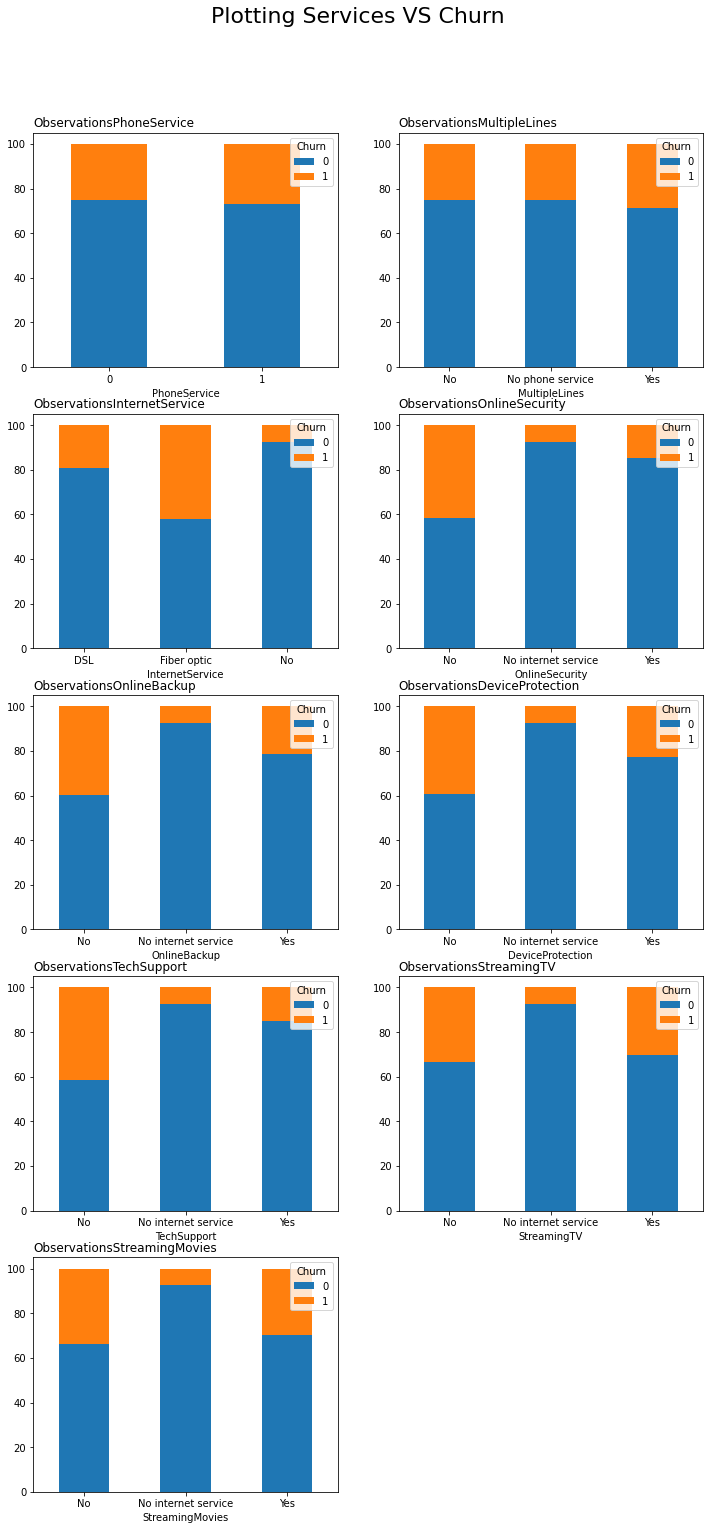

In [15]:
### Visualizations

services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
cols = 2
rows = math.ceil(len(services)/2)

# create a figure
fig = plt.figure(figsize=(12, 5 * rows)) 
fig.suptitle("Plotting Services VS Churn", fontsize=22,  y=.95)


for i, c in enumerate(services, 1):

    # create the subplot
    ax = fig.add_subplot(rows, cols, i)

    ind = pd.crosstab(df_telecom[c], df_telecom['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

    ind.plot(kind='bar', ax=ax, stacked=True)

    # set the legend in the upper right corner
    ax.legend(loc="upper right", title='Churn', fancybox=True)

    # set title and labels
    ax.set_title('Observations' + c,
                 fontsize=12, loc='left')

    ax.tick_params(rotation='auto')

    # eliminate the frame from the plot
    # spine_names = ('top', 'right', 'bottom', 'left')
    # for spine_name in spine_names:
    #     ax.spines[spine_name].set_visible(False)



### One-hot encoding

In [16]:
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV', 'PaymentMethod', 'StreamingMovies', 'Contract']

# encode categorical variables with more than two levels using one-hot encoding
df_telecom = pd.get_dummies(df_telecom, columns = one_hot_encoding_columns)

In [17]:
df_telecom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,1,1,0,0,0,1,0
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,1,1,0,0,1,0,0
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,1,0,1,0,0,1,0,0


### Standardization

In [18]:
df_temp = df_telecom[['tenure','MonthlyCharges','TotalCharges']]
normalized_df = (df_temp - df_temp.mean())/df_temp.std()

In [19]:
normalized_df

,tenure,MonthlyCharges,TotalCharges
0,-1.280157,-1.161611,-0.994123
1,0.064298,-0.260859,-0.173727
2,-1.239416,-0.363897,-0.959581
3,0.512450,-0.747797,-0.195234
4,-1.239416,0.196164,-0.940391
...,...,...,...
7038,-0.343113,0.664821,-0.129171
7039,1.612459,1.276402,2.240896
7040,-0.872746,-1.169921,-0.854453
7041,-1.157934,0.319145,-0.872033


In [20]:
df_telecom = df_telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)
df_telecom = pd.concat([df_telecom, normalized_df], axis = 1)

In [21]:
df_telecom

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,-1.280157,-1.161611,-0.994123
1,0,0,0,0,1,0,0,1,0,0,...,1,1,0,0,0,1,0,0.064298,-0.260859,-0.173727
2,0,0,0,0,1,1,1,1,0,0,...,1,1,0,0,1,0,0,-1.239416,-0.363897,-0.959581
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0.512450,-0.747797,-0.195234
4,1,0,0,0,1,1,1,1,0,0,...,0,1,0,0,1,0,0,-1.239416,0.196164,-0.940391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,0,0,0,1,...,1,0,0,1,0,1,0,-0.343113,0.664821,-0.129171
7039,1,0,1,1,1,1,0,0,0,1,...,0,0,0,1,0,1,0,1.612459,1.276402,2.240896
7040,1,0,1,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,-0.872746,-1.169921,-0.854453
7041,0,1,1,0,1,1,1,0,0,1,...,1,1,0,0,1,0,0,-1.157934,0.319145,-0.872033


### Multi collinearity

In [22]:
corr_imp = pd.DataFrame((df_telecom.corr()["Churn"]).abs().sort_values(ascending=False)[1:])

<BarContainer object of 40 artists>

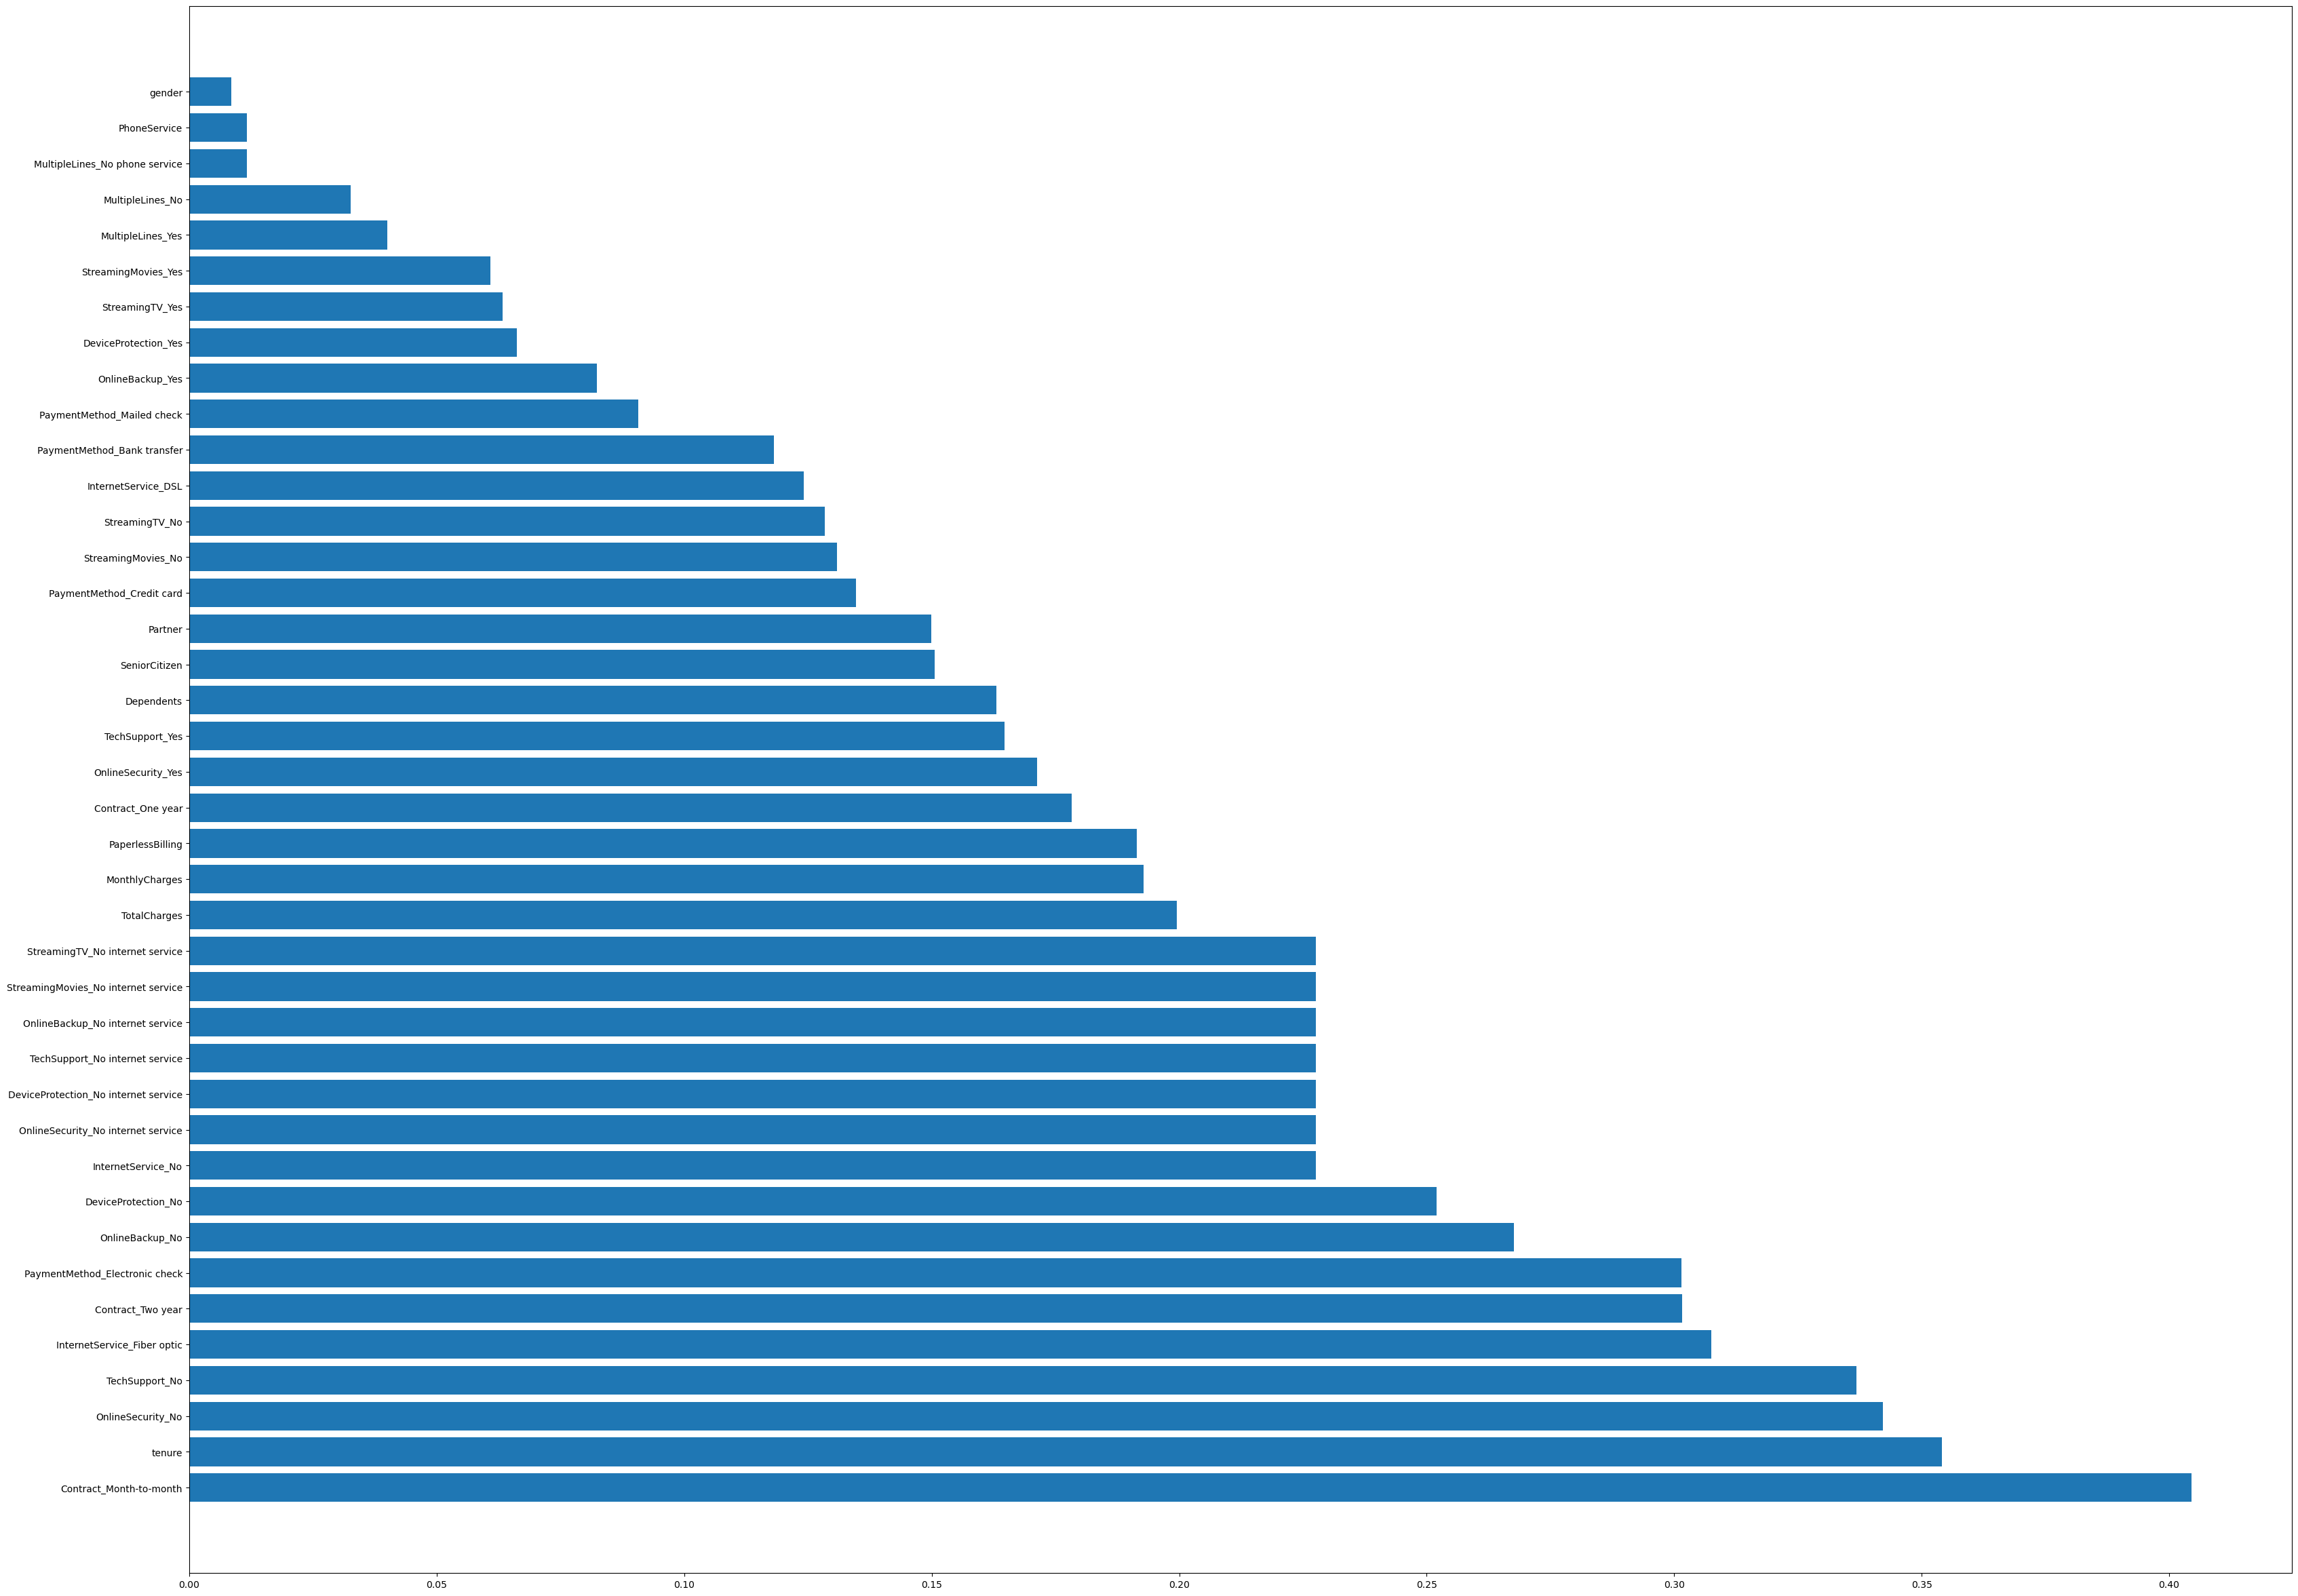

In [23]:
# plotting importance of features as per correlations
cols = list(df_telecom.columns)
cols.remove("Churn")

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(len(cols), 30))
ax.barh(list(corr_imp.index), list(corr_imp.Churn), align='center')

<AxesSubplot:>

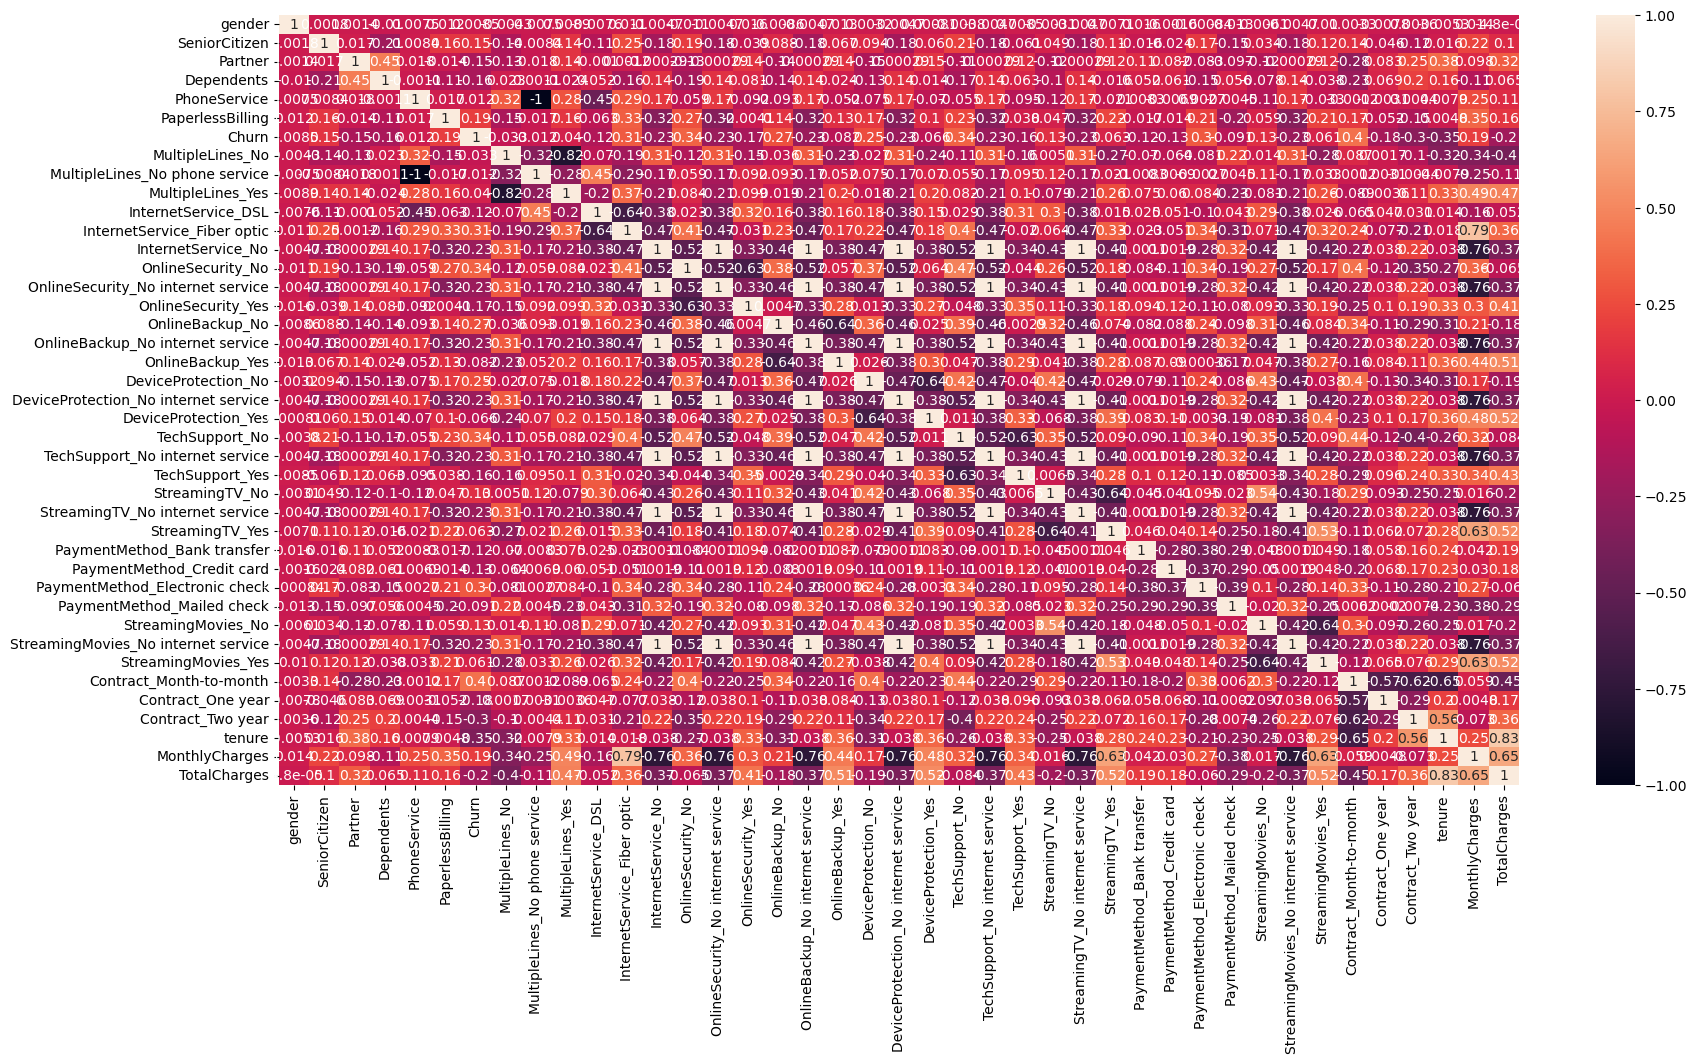

In [24]:
# plotting correlation matrix
plt.figure(figsize = (20,10))        
sns.heatmap(df_telecom.corr(),annot=True)

In [25]:
def vif_cal(input_data, dependent_col):
    df_vif = pd.DataFrame( columns = ['Var', 'Vif'])
    var = input_data.drop([dependent_col], axis=1)
    var_name = var.columns
    for i in range(0, var_name.shape[0]):
        y = var[var_name[i]] 
        x = var[var_name.drop(var_name[i])]
        rsq = sm.OLS(y,x).fit().rsquared  
        vif = round(1/(1-rsq),2)
        df_vif.loc[i] = [var_name[i], vif]
    return df_vif.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)
df_telecom_copy = df_telecom.copy()
vif_imp = vif_cal(df_telecom_copy,"Churn")

In [26]:
vif_imp.columns

Index(['Var', 'Vif'], dtype='object')

<BarContainer object of 40 artists>

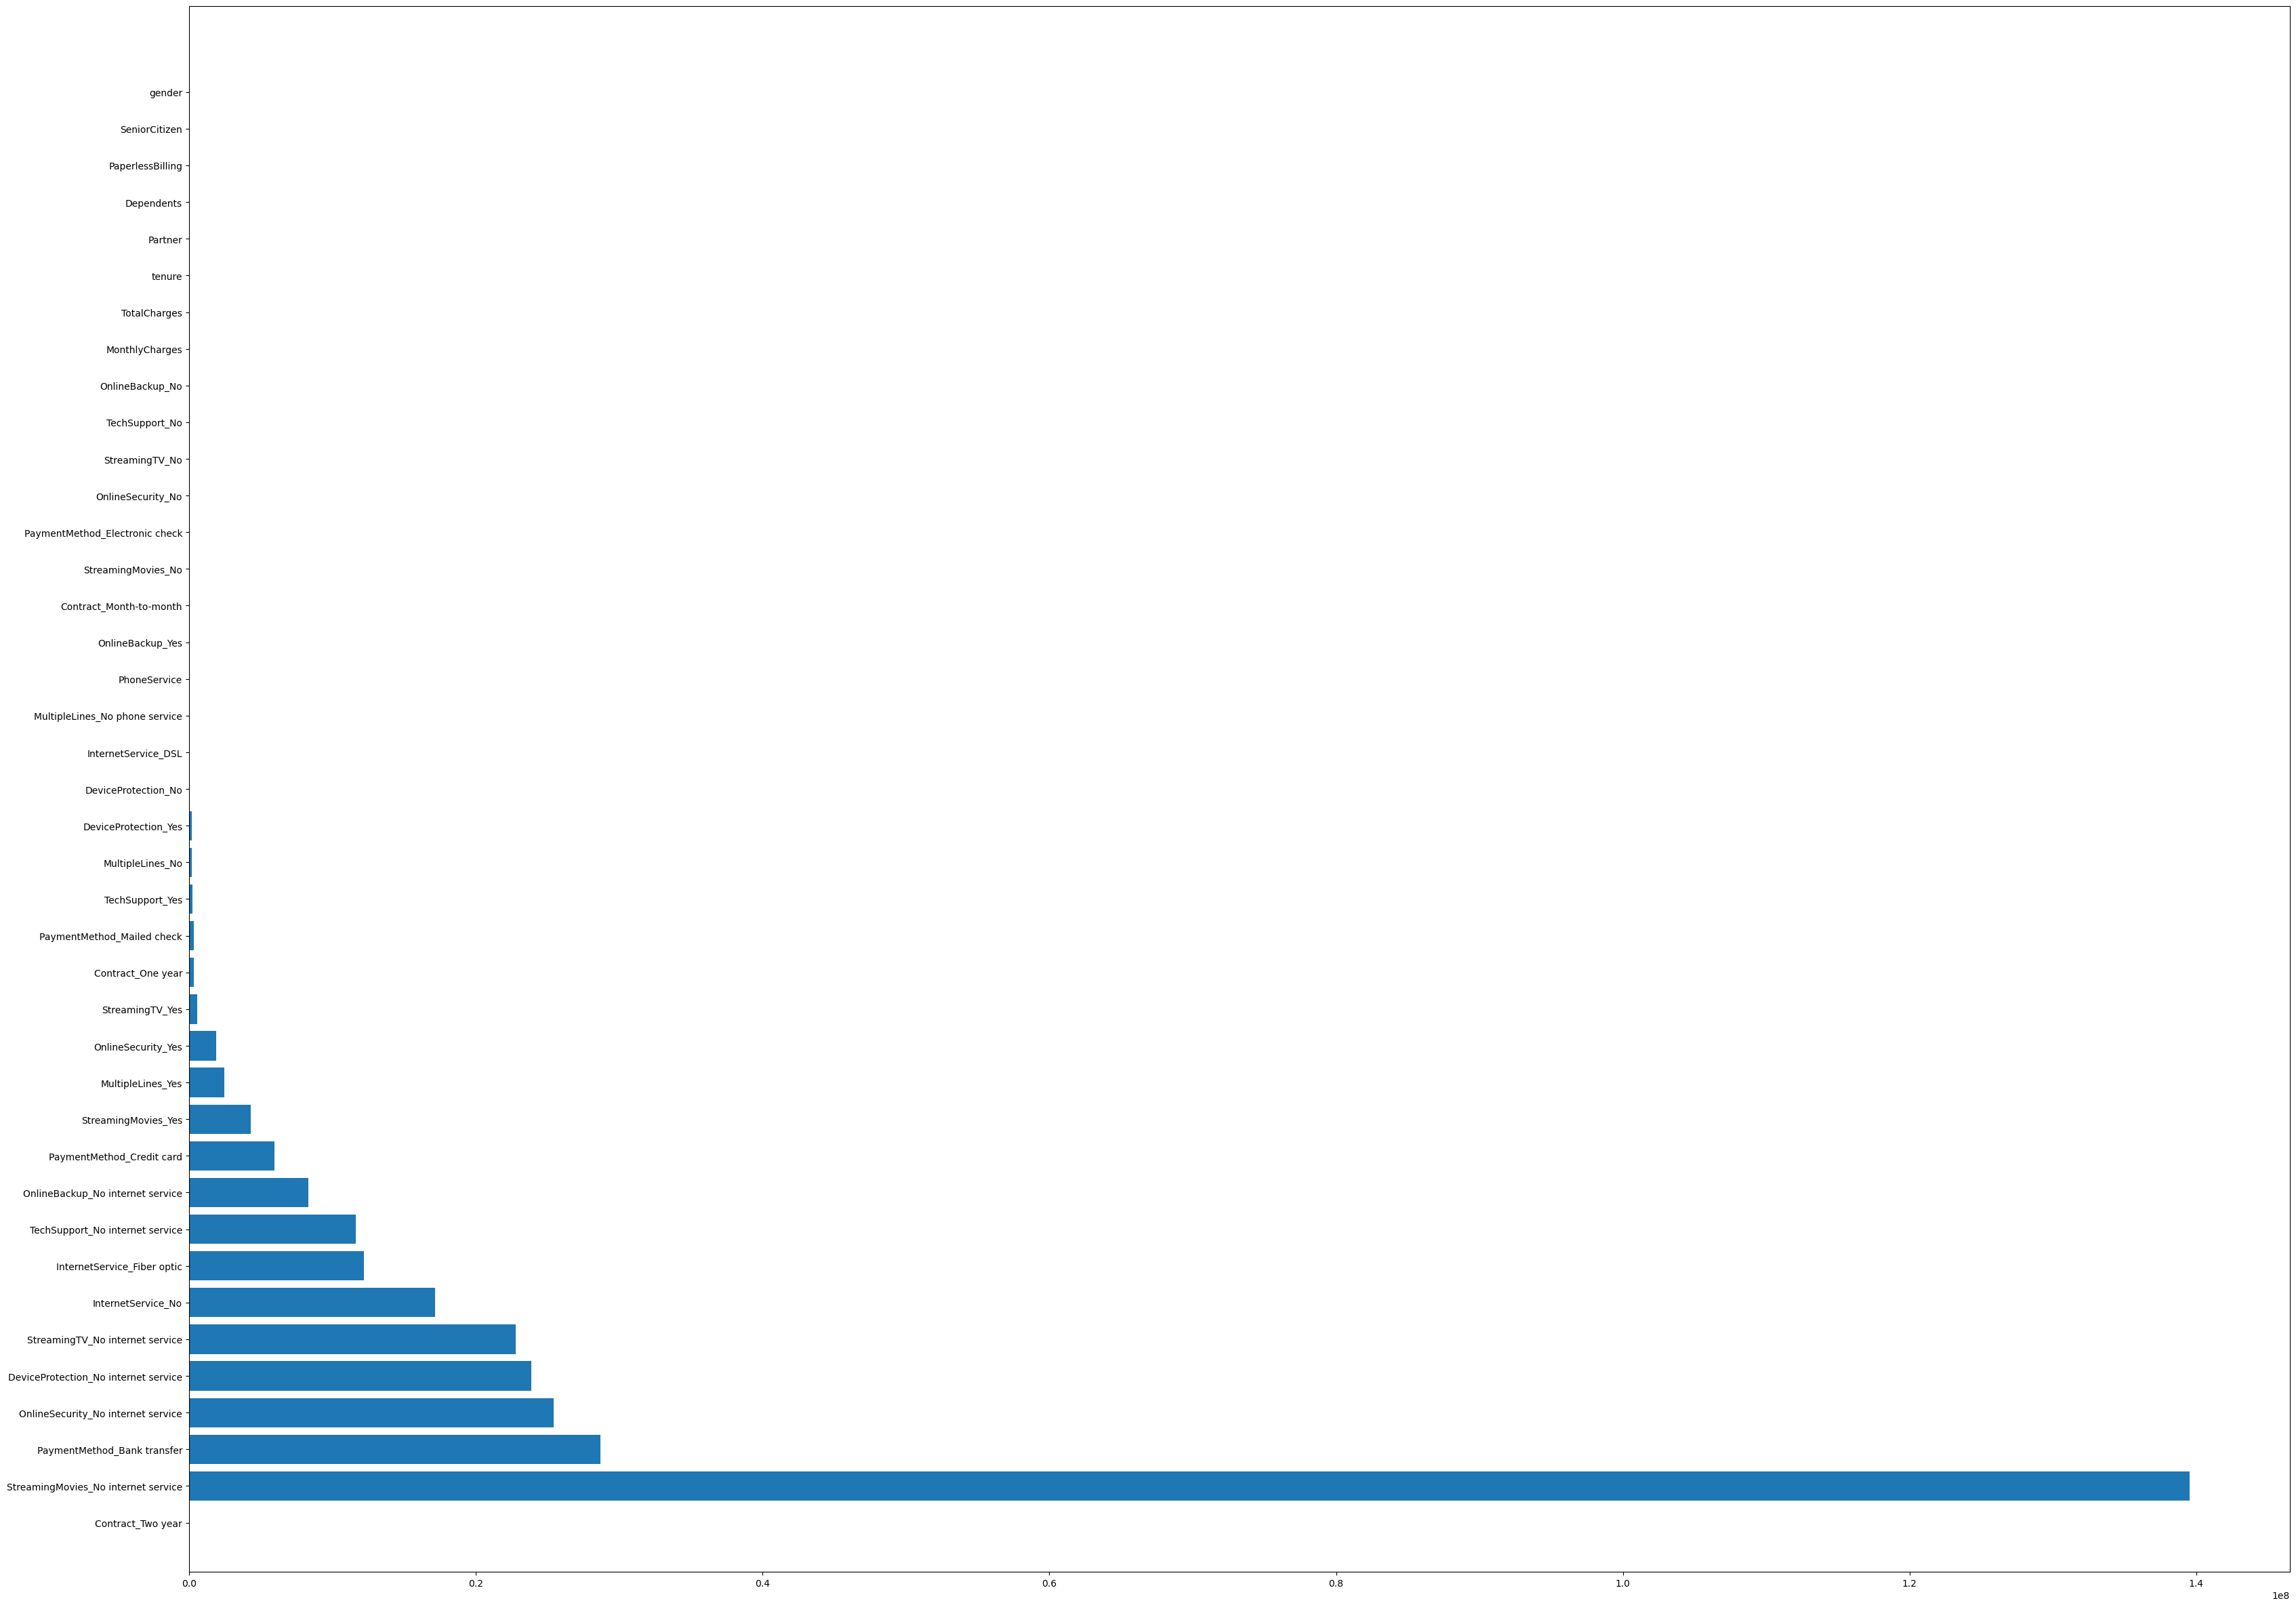

In [27]:
# plotting importance of features as per vif scores
# plotting importance of features as per correlations
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(vif_imp.shape[0], 30))
ax.barh(list(vif_imp.Var), list(vif_imp.Vif), align='center')

In [28]:
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df_telecom.Churn)

df_telecom_copy = df_telecom.copy().drop(["Churn"],axis=1)
feature_importance = df_telecom_copy.apply(compute_mutual_information).sort_values(ascending=False)


In [29]:
feature_importance = pd.DataFrame(feature_importance).sort_values(ascending=False,by=0)

<BarContainer object of 40 artists>

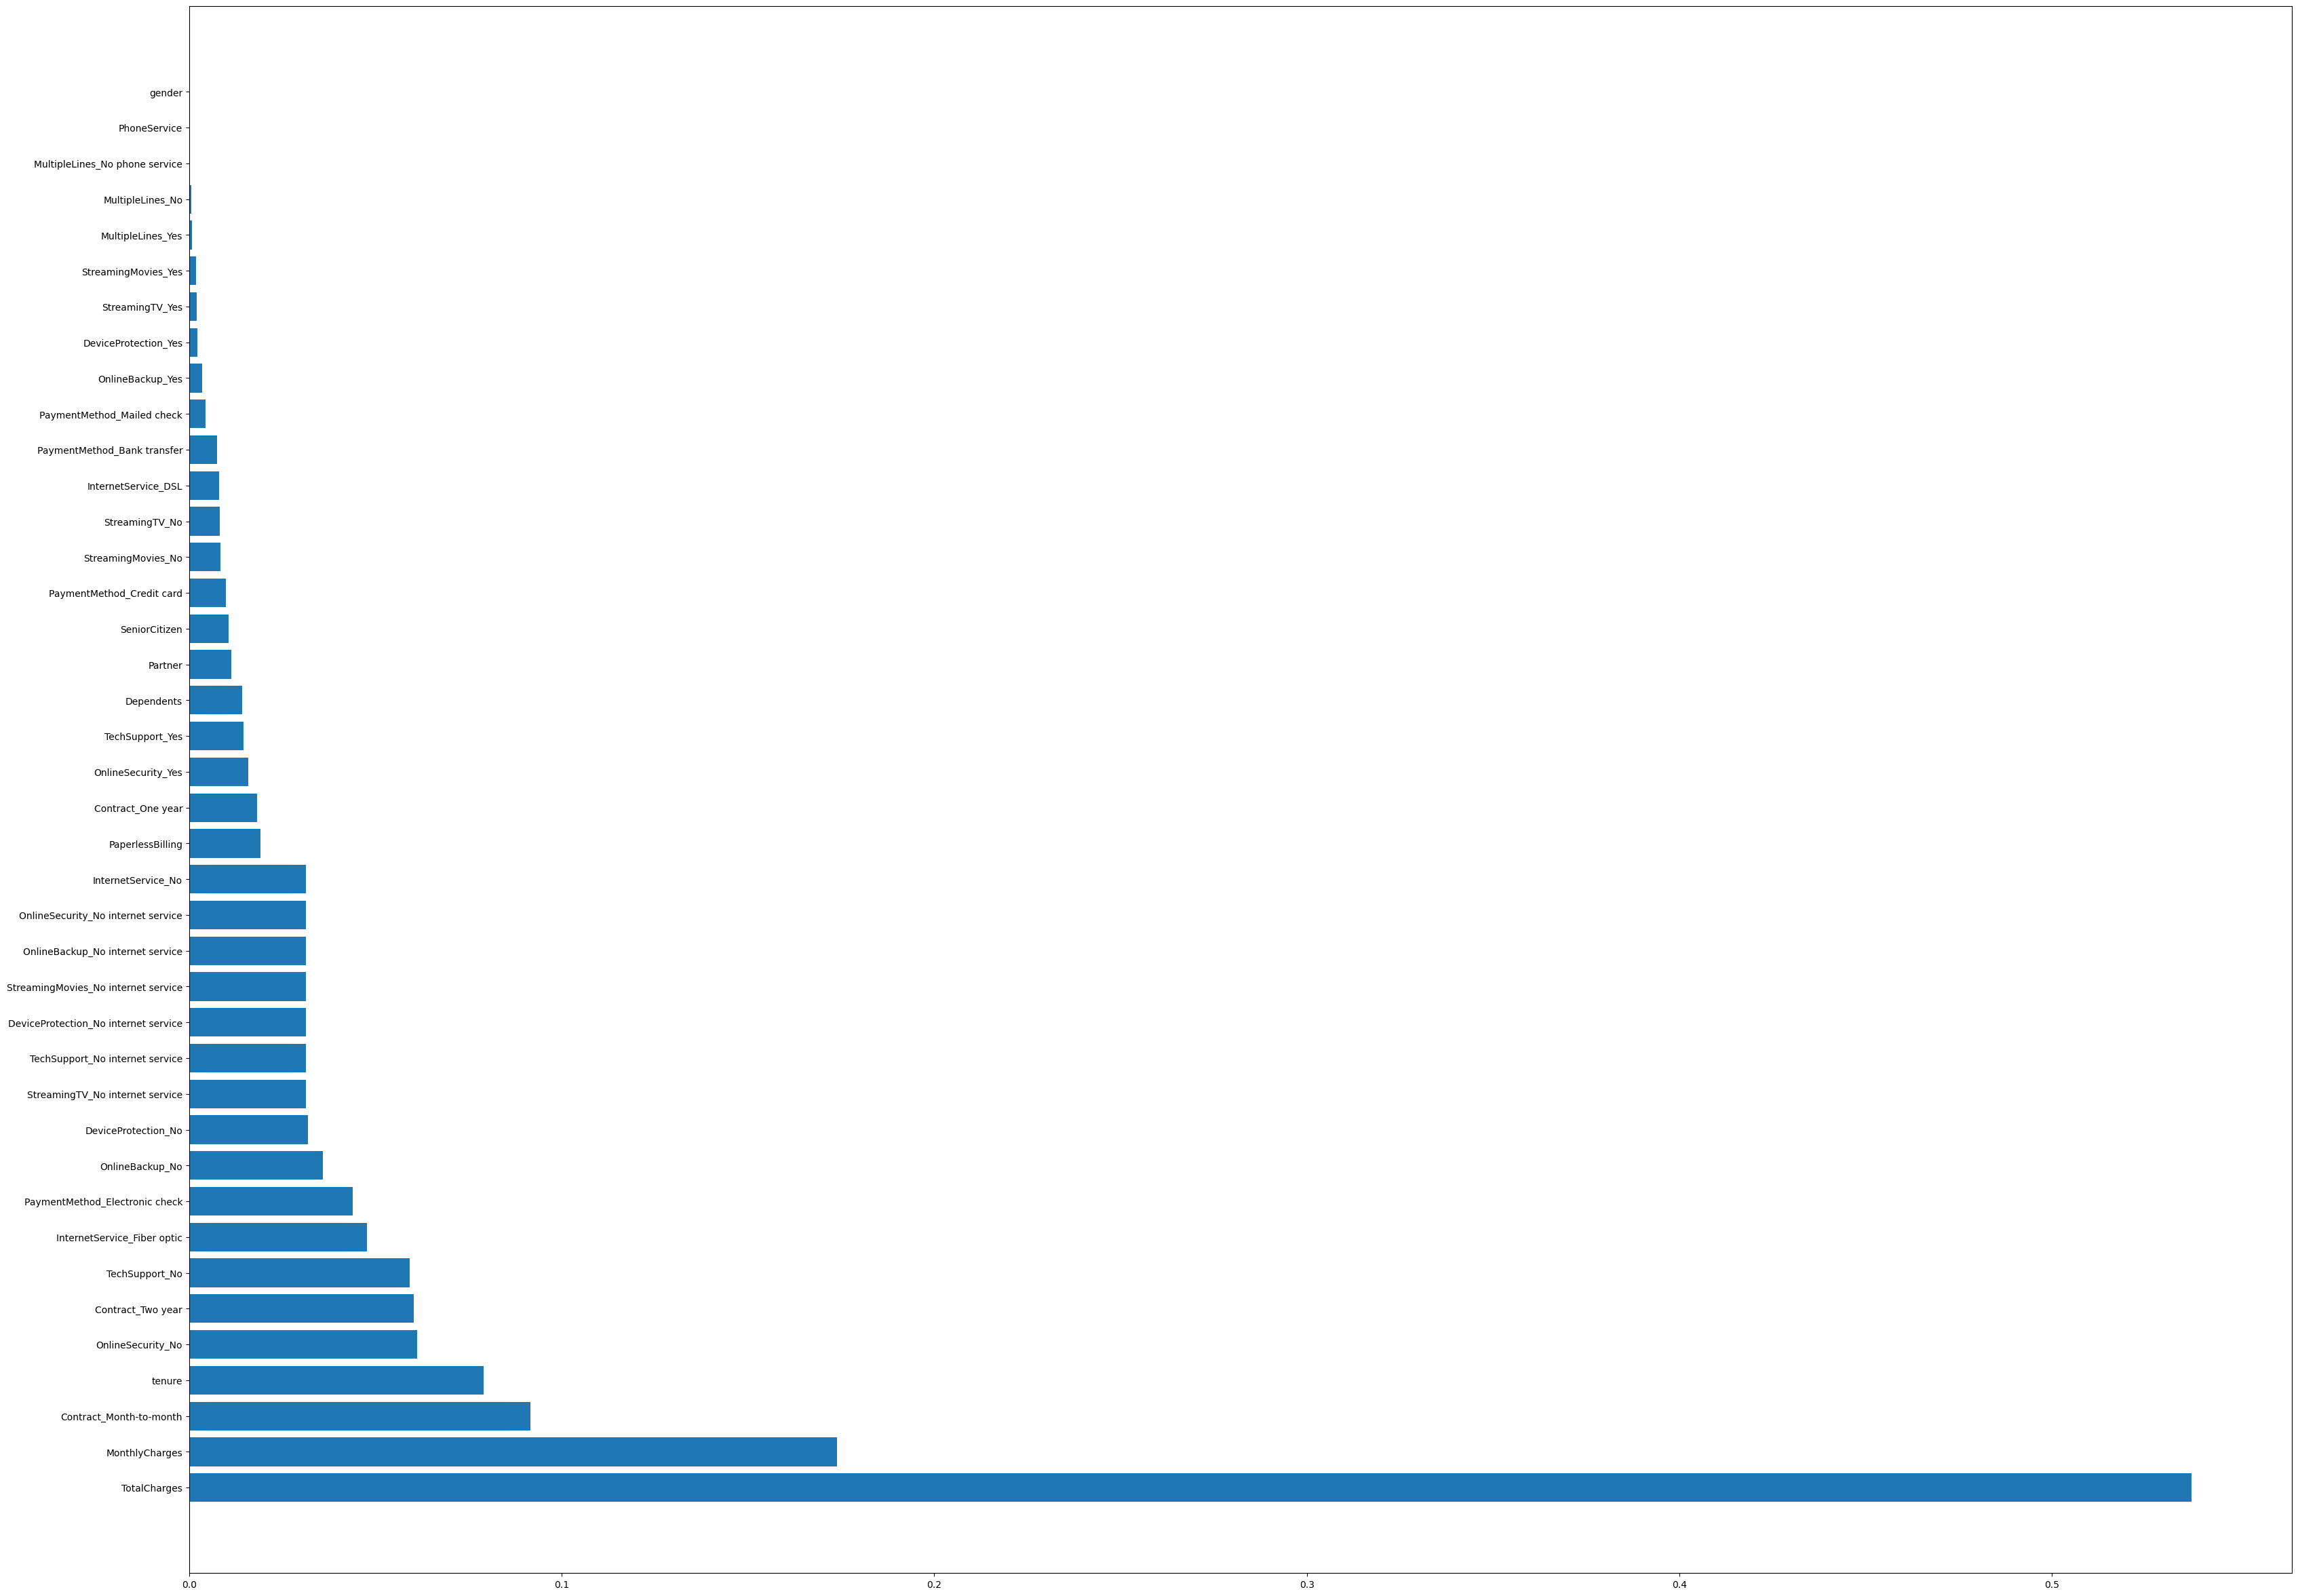

In [30]:
# Visualizing importance of features as per mutual_information

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(vif_imp.shape[0], 30))
ax.barh(list(feature_importance.index), list(feature_importance[0]), align='center')

## Task 2

For the following dataset, run an experiment where you apply each of 3/4 different dimension reduction algorithms with a range of values from at least 1 for destination dimension and record the accuracy of a classification method. Plot the experiment with accuracy(score) as the y axis and the dimension as the x-axis.

Note: for the second part of the question take logistic regression classification on the data set and one dimension reductional algorithm and record the accuracy with respect to different components and plot te graph. (to apply classification you will have to go through the data description and create the target variable by combining both files farm_vect and farm_ads )

### Loading Data

In [31]:
path2 = path + "farm-data/"
farm_ads = pd.read_csv(path2 + 'farm-ads', sep = " ", error_bad_lines = False, header = None)
farm_vect = pd.read_csv(path2 + 'farm-ads-vect', sep = " ", error_bad_lines = False,header = None)

b'Skipping line 2: expected 12 fields, saw 499\nSkipping line 3: expected 12 fields, saw 83\nSkipping line 4: expected 12 fields, saw 160\nSkipping line 7: expected 12 fields, saw 16\nSkipping line 8: expected 12 fields, saw 362\nSkipping line 9: expected 12 fields, saw 182\nSkipping line 10: expected 12 fields, saw 143\nSkipping line 11: expected 12 fields, saw 109\nSkipping line 12: expected 12 fields, saw 208\nSkipping line 13: expected 12 fields, saw 966\nSkipping line 14: expected 12 fields, saw 1056\nSkipping line 15: expected 12 fields, saw 7373\nSkipping line 16: expected 12 fields, saw 1137\nSkipping line 17: expected 12 fields, saw 165\nSkipping line 18: expected 12 fields, saw 524\nSkipping line 19: expected 12 fields, saw 202\nSkipping line 20: expected 12 fields, saw 2076\nSkipping line 21: expected 12 fields, saw 142\nSkipping line 22: expected 12 fields, saw 908\nSkipping line 23: expected 12 fields, saw 163\nSkipping line 24: expected 12 fields, saw 14\nSkipping line 25

In [32]:
farm_ads

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,ad-jerry,ad-bruckheimer,ad-chase,ad-premier,ad-sept,ad-th,ad-clip,ad-bruckheimer,ad-chase,page,found
1,-1,ad-symptom,ad-muscle,ad-weakness,ad-genetic,ad-disease,ad-symptom,ad-include,ad-search,ad-learn,page,found
2,1,ad-animal,ad-animal,ad-wild,ad-sa,ad-official,ad-tourism,ad-website,page,found,NaN,NaN
3,-1,ad-vaccination,ad-expert,ad-tip,ad-info,ad-article,ad-treatment,ad-option,ad-support,page,found,NaN
4,1,ad-vet,ad-online,ad-veterinarian,ad-online,ad-question,ad-answer,ad-asap,bad,request,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
312,1,ad-animal,ad-animal,ad-wild,ad-sa,ad-official,ad-tourism,ad-website,page,found,NaN,NaN
313,1,ad-vet,ad-online,ad-veterinarian,ad-online,ad-question,ad-answer,ad-asap,bad,request,NaN,NaN
314,1,ad-doctor,ad-online,ad-doctor,ad-online,ad-question,ad-answer,ad-asap,bad,request,NaN,NaN
315,1,ad-peapod,ad-official,ad-site,ad-grocery,ad-deliver,ad-door,page,found,NaN,NaN,NaN


In [33]:
farm_vect

,0,1,2,3,4,5,6,7,8,9
0,1,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1
1,1,8:1,9:1,437:1,438:1,439:1,440:1,441:1,442:1,NaN
2,1,4250:1,4251:1,4252:1,4253:1,4254:1,4255:1,4256:1,4257:1,NaN
3,1,963:1,964:1,965:1,966:1,967:1,968:1,2078:1,3303:1,NaN
4,-1,8:1,9:1,16:1,436:1,5563:1,5564:1,5565:1,5566:1,NaN
...,...,...,...,...,...,...,...,...,...,...
316,1,964:1,966:1,967:1,968:1,2078:1,3303:1,4968:1,NaN,NaN
317,1,8:1,9:1,437:1,438:1,439:1,440:1,441:1,442:1,NaN
318,1,963:1,964:1,965:1,966:1,967:1,968:1,2078:1,3303:1,NaN
319,1,964:1,966:1,967:1,968:1,2078:1,3303:1,4968:1,NaN,NaN


In [34]:
data = farm_ads.merge(farm_vect, right_index = True,left_index = True)
data

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y
0,1,ad-jerry,ad-bruckheimer,ad-chase,ad-premier,ad-sept,ad-th,ad-clip,ad-bruckheimer,ad-chase,...,1,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1
1,-1,ad-symptom,ad-muscle,ad-weakness,ad-genetic,ad-disease,ad-symptom,ad-include,ad-search,ad-learn,...,1,8:1,9:1,437:1,438:1,439:1,440:1,441:1,442:1,NaN
2,1,ad-animal,ad-animal,ad-wild,ad-sa,ad-official,ad-tourism,ad-website,page,found,...,1,4250:1,4251:1,4252:1,4253:1,4254:1,4255:1,4256:1,4257:1,NaN
3,-1,ad-vaccination,ad-expert,ad-tip,ad-info,ad-article,ad-treatment,ad-option,ad-support,page,...,1,963:1,964:1,965:1,966:1,967:1,968:1,2078:1,3303:1,NaN
4,1,ad-vet,ad-online,ad-veterinarian,ad-online,ad-question,ad-answer,ad-asap,bad,request,...,-1,8:1,9:1,16:1,436:1,5563:1,5564:1,5565:1,5566:1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,1,ad-animal,ad-animal,ad-wild,ad-sa,ad-official,ad-tourism,ad-website,page,found,...,1,8:1,9:1,659:1,1596:1,4065:1,6114:1,7074:1,7075:1,NaN
313,1,ad-vet,ad-online,ad-veterinarian,ad-online,ad-question,ad-answer,ad-asap,bad,request,...,-1,8:1,9:1,659:1,4258:1,5423:1,6825:1,11409:1,40783:1,54319:1
314,1,ad-doctor,ad-online,ad-doctor,ad-online,ad-question,ad-answer,ad-asap,bad,request,...,-1,8:1,9:1,429:1,433:1,456:1,5176:1,NaN,NaN,NaN
315,1,ad-peapod,ad-official,ad-site,ad-grocery,ad-deliver,ad-door,page,found,NaN,...,-1,8:1,9:1,16:1,436:1,826:1,5564:1,5565:1,15009:1,NaN


In [35]:
le = preprocessing.LabelEncoder()
for name in data.columns:
    if data[name].dtypes == "O":
        data[name] = data[name].astype(str)
        le.fit(data[name])
        data[name] = le.transform(data[name])

In [36]:
data['target'] = data['0_x'] + data['0_y']
data = data.drop(['0_x','0_y'],axis = 1)
data

,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10,...,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,target
0,34,8,13,56,70,71,11,7,5,10,...,2,5,19,42,61,66,75,77,36,2
1,72,48,76,30,17,69,38,43,16,10,...,15,24,28,38,35,36,52,61,37,0
2,1,3,78,66,50,72,79,64,39,9,...,9,9,22,30,30,33,50,59,37,2
3,78,22,72,39,5,73,49,49,41,8,...,17,22,47,63,75,76,34,51,37,0
4,79,52,75,52,60,0,2,60,42,9,...,15,24,11,37,52,49,61,69,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,1,3,78,66,50,72,79,64,39,9,...,15,24,38,5,26,58,70,74,37,2
313,79,52,75,52,60,0,2,60,42,9,...,15,24,38,31,48,64,5,58,31,0
314,15,52,24,52,60,0,2,60,42,9,...,15,24,24,36,38,42,78,79,37,0
315,48,51,61,34,13,17,86,62,40,9,...,15,24,11,37,73,49,61,14,37,0


In [37]:
X = data.drop('target',axis = 1)
y = data['target']

#### Linear Discriminant Analysis

In [39]:
#pipelining
lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage = 'auto')
# pd.DataFrame(lda.fit_transform(X_std,y))
lsteps = [('lda', LinearDiscriminantAnalysis()), ('m', GaussianNB())]
model = Pipeline(steps=lsteps)

In [40]:
# evaluating model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [41]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.546 (0.084)


#### VarianceThreshold Analysis

In [42]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_new = VarianceThreshold(threshold=(0.999)).fit_transform(X_std)
print(X_new.shape)
X_new = VarianceThreshold(threshold=(1)).fit_transform(X_std)
print(X_new.shape)

(317, 20)
(317, 4)


In [43]:
vsteps = [('vt', VarianceThreshold()), ('m', GaussianNB())]
model = Pipeline(steps=steps)

NameError: name 'steps' is not defined

In [ ]:
# evaluating model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_std, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#### PCA with logistic regression

In [ ]:
#pipelining
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

In [ ]:
# Stratified KFold Cross Validation with Logistic Regression
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#### Standardization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5, stratify = y)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_std.shape, X_train_std.T.shape

#### PCA

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

In [ ]:
plt.bar(range(1,21),pca.explained_variance_ratio_,label = 'Variance Explained')
plt.step(range(1,21),np.cumsum(pca.explained_variance_ratio_),label = 'CumSum Variance Explained',c = 'r')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Testing PCA for 6 components

In [ ]:
pca = PCA(n_components = 6)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
colors=['r','b','g','y']
markers=['o','x','s']

for cls, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == cls, 0], 
                X_train_pca[y_train == cls, 1], 
                c = c, label = cls, marker = m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

As we can observe that 6 components is not a good fit, we will tune the hyper parameters to find the number of components which will be the best fit for the Principal component Analysis to reduce the dimensionality.

#### Hyper-parameter tuning

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),('pca', PCA()),('model', LogisticRegression(solver = 'lbfgs', multi_class = 'ovr'))])
para = {'pca__n_components':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],'model__C':[0.01, 0.1, 1.0, 10.0, 100.0]}
grid = GridSearchCV(pipe,param_grid = para, scoring = 'accuracy',cv = 5)
grid.fit(X, y)

In [ ]:
grid.best_params_,grid.best_score_

The best fit is at 7 components

In [ ]:
pipe[1].fit(X,y)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (7, 7), sharex = True)

ax[0].plot(range(1,21),pipe[1].explained_variance_ratio_, '+', linewidth = 10, label = 'Variance Explained')
ax[0].axvline(grid.best_estimator_.named_steps['pca'].n_components, linestyle = ':', linewidth = 4, color = 'r', label = 'Best PC')
ax[0].set_ylabel('Explained variance ratio')
ax[0].set_xlabel('Principle Components')
ax[0].legend()

# Plot the accuracy wrt to pc_components
result = pd.DataFrame(grid.cv_results_)
best_clf = result.groupby('param_pca__n_components').apply(lambda g: g.nlargest(1, 'mean_test_score'))
best_clf.plot('param_pca__n_components', 'mean_test_score', ax = ax[1], yerr = 'std_test_score')
ax[1].set_ylabel('Accuracy')
plt.tight_layout()
plt.savefig('PCA_5.png')
plt.show()

Here it is observed that the best accuracy is 57.74% and is for components 7, the accuracy for components is shown in the above graph.

In the above model, we have applied Logistic regression with PCA along with the Gridsearch CV, i.e. the hyper parameter tuning the model to find the best results, also done. !!!

## Task 3

Download the following two datasets from the UCI repository:

    EEG Steady-State Visual Evoked Potential Signals Data Set 
    Repeat Consumption Matrices Data Set
    
Make sure all the features are numerical and then try to use what you learned in this course to visualize these two datasets. Report the plots you made as well as any structure you noticed in the dataset.

Note: In "EEG Steady-State Visual Evoked Potential Signals Data Set" and "Repeat Consumption Matrices Data Set", there are many CSV files. Please choose only one CSV file from each dataset.


### Part 1

In [ ]:
path3 = path + "BCI-SSVEP_Database_Aceves/"
data = pd.read_csv(path3 + "A001SB1_1.csv")

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
data.columns = ['sno', 'recorded', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14']

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

No Null values found.

In [ ]:
for col in data.columns:
    plt.figure()
    sns.distplot(data[col])

The distribution of the spread of columns can be observed above, The distributions in the columns c1,c5,c6,c7,c8,c9,c10,c14 are normally distributed compared to the other columns !!!

In [ ]:
plt.subplots(figsize=(25,16))
sns.heatmap(data.corr(), cmap = 'Greens', annot = True, linewidths = 2, annot_kws = {"fontsize" : 15})

Here it is observed that c6 is highly corelated with c7, c7 is with c8, c8 with c13, and c6,c7,c8, c13 with c9 !!!

#### Feature Standardisation 

In [ ]:
# Normalising continuous features
df = data[['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14']]
normalized_df = (df - df.mean())/df.std()
data = data.drop(['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14'], 1)
data = pd.concat([data,normalized_df],axis=1)

In [ ]:
data

#### Model Building

In [ ]:
# Putting feature variable to X
X = data.drop(['sno','recorded'],axis=1)

# Putting response variable to y
y = data['recorded']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

As the target column has only one value the above cell throws an error.

Since we are not building a model and instead the objective is to do exploratory data analysis/visualization this error is not relevant in this context.

### Part 2

In [ ]:
path3_ = path + 'data/'
df_train = pd.read_csv(path3_ + "go_sf/train.csv")
df_test = pd.read_csv(path3_ + "go_sf/test.csv")
df_val = pd.read_csv(path3_ + "go_sf/validation.csv")

In [ ]:
df_train.info()

In [ ]:
df_train.describe()

In [ ]:
df_train.isnull().sum()

In [ ]:
df_train.nunique()

#### Visualise the relationship between the features and the response using scatterplots

In [ ]:
sns.pairplot(df_train, x_vars = ['0','30'], y_vars = '2',height = 7, aspect = 0.7, kind = 'scatter')

In [ ]:
plt.subplots(figsize = (25, 16))
sns.heatmap(df_train.corr(), cmap = 'Greens', annot = True, linewidths = 2, annot_kws = {"fontsize" : 15})

In [ ]:
x_train = df_train[['0','30']]
y_train = df_train['2']

x_test = df_test[['1','180']]
y_test = df_test['1.1']

x_val = df_val[['1','64']]
y_val = df_val['1.1']

In [ ]:
df_test

In [ ]:
df_val

#### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

In [ ]:
lr.intercept_

In [ ]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lr.coef_, x_test.columns, columns = ['Coefficient'])
coeff_df

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2_score_ = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score value:", r2_score_)

In [ ]:
x_train_sm = x_train
x_train_sm = sm.add_constant(x_train_sm)
lr_1 = sm.OLS(y_train, x_train_sm).fit()
lr_1.params

In [ ]:
print(lr_1.summary())

In [ ]:
y_pred_val = lr.predict(x_val)

In [ ]:
mse_val = mean_squared_error(y_val,y_pred_val)
r2_score_ = r2_score(y_val,y_pred_val)

print("Mean Squared Error Validation:", mse_val)
print("R2 Score value Validation:",r2_score_)

#### Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state = 42)

#### Fitting the model

In [ ]:
lr_model.fit(x_train, y_train) 

In [ ]:
lr_score = lr_model.score(x_train, y_train)
print('Accuracy of Logistic Regression Model :',lr_score)

In [ ]:
lr_score = lr_model.score(x_test, y_test)
print('Accuracy of Test data on Logistic Regression :',lr_score)

The test accuracy is 84.67% 

In [ ]:
lr_score = lr_model.score(x_val, y_val)
print('Accuracy of Validation data on Logistic Regression :',lr_score)

##### The final Validation accuracy of the multiple linear regression model is 85.33% 